In [1]:
import psycopg2 as pg
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, ion, show
import numpy as np
import sys
ion()


In [2]:
con = pg.connect("host='data-challenge.cpzsedc9pony.us-west-2.redshift.amazonaws.com' dbname='dev' user='' port='' password=''")


In [3]:
cur = con.cursor()


In [4]:
cur.execute("""select eventname,count(*) from ios_events group by eventname""")


In [5]:
row_share_search = cur.fetchall()
rarray = np.array(row_share_search)
row_search=rarray[0,1].astype(np.float)
row_share=rarray[1,1].astype(np.float)
print (row_share_search[0][0]+"=" + str(row_search) )

textsearch=34262927.0


In [6]:
print (row_share_search[1][0]+"=" + str(row_share) )


share=22512088.0


In [7]:
share_ra=row_share/(row_search+row_share)
print("share rate = " + str(share_ra))


share rate = 0.396513994756


In [8]:

cur.execute("""select tags ,eventname, count(*) as "Shared rates 
of tags" from ios_events where ios_events.category='search' 
and ios_events.eventname='share' group by tags,eventname 
order by count(*) DESC limit 1000""")


In [9]:
most_search=cur.fetchall()
m_s_array = np.array(most_search)
share_rate_top1000=[]

In [10]:
for ii in range(len(most_search)):
    share_rate_top1000.append(m_s_array[ii,2].astype(np.float)/row_share)
    print (share_rate_top1000[ii])


0.00862438881724
0.00424265399105
0.00328810015313
0.00325394072731
0.00292904860713
0.00281706432562
0.00280489308677
0.00266319143742
0.00205329687766
0.001995550124
0.00197893682718
0.00188423215119
0.00177424679577
0.00175750023721
0.00174563994242
0.00171490090124
0.00169508932268
0.00165688762411
0.00161424386756
0.00160340524611
0.00156480376232
0.00154508102491
0.0015201166591
0.00146743385154
0.00145757248284
0.00144664502022
0.00137739333642
0.00137033046424
0.00136677681786
0.00128499853057
0.00128348823086
0.00127811334071
0.0012662974665
0.00124173288591
0.00121987796068
0.00120499706646
0.0011996665969
0.00118447475863
0.00117630137196
0.00116253099224
0.00114338572237
0.00112197500294
0.00109581128148
0.00107804304958
0.00106684906349
0.00102034071651
0.00100639265447
0.00100394952259
0.00100079566142
0.000993333004029
0.000991023133883
0.000990090301708
0.00095117787386
0.000936874447186
0.000933631744865
0.000927723807761
0.000920794197322
0.000918395486016
0.000915907

0.00011389436644
0.000113716684121
0.000113672263541
0.000113450160643
0.000113450160643
0.000113361319483
0.000113316898903
0.000112961534266
0.000112961534266
0.000112917113686
0.000112872693106
0.000112872693106
0.000112739431367
0.000112650590207
0.000112339646149
0.00011225080499
0.00011225080499
0.00011220638441
0.00011220638441
0.000111939860932
0.000111628916873
0.000111317972815
0.000111229131656
0.000111184711076
0.000111140290496
0.000111095869917
0.000110829346438
0.000110829346438
0.000110784925858
0.000110696084699
0.00011060724354
0.00011060724354
0.000110296299481
0.000110251878902
0.000109985355423
0.000109718831945
0.000109629990785
0.000109541149626
0.000109319046727
0.000109141364408
0.000109141364408
0.000108963682089
0.00010887484093
0.000108741579191
0.000108652738031
0.000108652738031
0.000108563896872
0.000108519476292
0.000108430635133
0.000108386214553
0.000108297373393
0.000108252952814
0.000108208532234
0.000108119691074
0.000107986429335
0.000107986429335


In [11]:
print (share_rate_top1000[2])



0.00328810015313


In [12]:
cur.execute("""select count(Distinct tags) from ios_events""")
distincst_tags=cur.fetchall()
No_dist_tags=(np.array(distincst_tags)).astype(np.float)[0][0]
print ("Number of unique search terms=" + str(No_dist_tags))


Number of unique search terms=2729143.0


In [13]:
%matplotlib inline

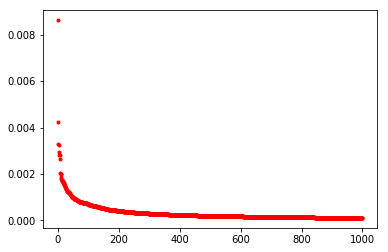

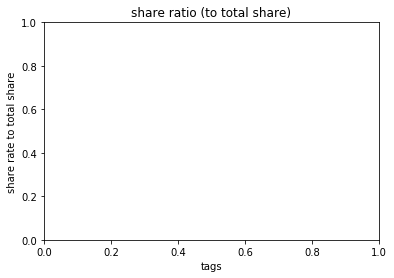

In [14]:
plt.figure(0)
plt.plot(share_rate_top1000, '.' , color='red')
plt.show()
plt.title('share ratio (to total share)')
plt.xlabel('tags')
plt.ylabel('share rate to total share')
#plt.savefig('share.pdf',format='pdf')


In [18]:
distinct_gif=cur.fetchall()
No_dist_gif=(np.array(distinct_gif)).astype(np.float)[0][0]
print ("Number of unique gifs =" + str(No_dist_gif))


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
cur.execute("""select riffid,count(*) from ios_events group by riffid order by count(*) DESC limit 2000""")
gif_counts=cur.fetchall()
gif_count_array=[]

In [17]:
for ii in range(len(gif_counts)):
        gif_count_array.append((np.array(gif_counts)).astype(np.float)[ii][1])

NameError: name 'gif_counts' is not defined

In [16]:
%matplotlib inline
plt.figure(1)
plt.plot(gif_count_array[1:], '.', color = "blue")
plt.title('count for diff gifs')
plt.xlabel('gifs')
plt.ylabel('gif counts for the first 2000 top')
#plt.savefig('gif.pdf',format='pdf')


NameError: name 'gif_count_array' is not defined

In [ ]:
cur.execute("""create table newtablepython as 
                select *,case when EXTRACT('EPOCH' FROM timestamp)- EXTRACT('EPOCH' FROM last_event) >= (60) 
                OR last_event IS NULL then 1 else 0 end as session_start 
                FROM (SELECT *,LAG(timestamp) OVER (PARTITION BY keyboardid ORDER BY timestamp) AS last_event 
                FROM ios_events) last""")


In [ ]:
cur.execute("""create table NewBigTablepython as 
                SELECT *, SUM(session_start) 
                OVER (partition by keyboardid order by timestamp rows between unbounded preceding and current row ) 
                AS user_search_session_id ,   
                SUM(session_start) 
                OVER (ORDER BY keyboardid, timestamp rows between unbounded preceding and current row) 
                AS all_search_session_ids 
                FROM newtablepython""")
